In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime

from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [19]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)

In [20]:
df.drop('Adj Close', inplace = True, axis=1)

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df.set_index('Date',inplace=True)

In [23]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,2.658010e+07
...,...,...,...,...,...
2021-06-07,35835.265625,36790.570313,33480.640625,33560.707031,3.368394e+10
2021-06-08,33589.519531,34017.386719,31114.443359,33472.632813,4.990205e+10
2021-06-09,33416.976563,37537.371094,32475.865234,37345.121094,5.397292e+10


# Trend długoterminowy - spadkowy

In [24]:
Start = '2018-02-25'
End = '2019-05-05'

In [25]:
df1 = df.loc[Start:End]
df1

,Open,High,Low,Close,Volume
Date,,,,,
2018-02-25,9796.419922,9923.219727,9407.059570,9664.730469,5.706940e+09
2018-02-26,9669.429688,10475.000000,9501.730469,10366.700195,7.287690e+09
2018-02-27,10393.900391,10878.500000,10246.099609,10725.599609,6.966180e+09
2018-02-28,10687.200195,11089.799805,10393.099609,10397.900391,6.936190e+09
2018-03-01,10385.000000,11052.299805,10352.700195,10951.000000,7.317280e+09
...,...,...,...,...,...
2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,1.367953e+10
2019-05-02,5402.422852,5522.262695,5394.217285,5505.283691,1.464446e+10
2019-05-03,5505.552246,5865.881836,5490.201660,5768.289551,1.872078e+10


In [26]:
df1.index = df1.index.map(mdates.date2num)

In [27]:
# Sprawdzamy czy pierwsze wystąpiło max_v czy min_v
# Jeśli 1 jest min_v - trend wzrostowy
# Jeśli 1 jest max_v - trend spatkowy
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()
if Min_pozycja > Max_pozycja:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Max_pozycja}')
else:
    print(f'Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Min_pozycja}')

Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: 8


In [28]:
# wyznaczamy najniższy punkt jako koniec analizowanego okresu
Max_idx = df1.iloc[Min_pozycja].name
Max_idx

17880.0

In [29]:
#Pozycja Najwyższej wartościw w indeksie
Ax = df1.iloc[Max_pozycja].name
Ax

17595.0

In [30]:
# Wartość pozycji
Ay = df1['High'].loc[Ax]
Ay

11704.099609

In [31]:
A = [Ax, Ay]
A

[17595.0, 11704.099609]

In [32]:
df2 = df1[:Max_idx]
while len(df2)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df2.index, y=df2['High'])
    df2 = df2.loc[df2['High'] > slope * df2.index + intercept]
    
Bx = df2.index.min()
By = df2['High'].loc[Bx]
B = [Bx, By]
B

[17843.0, 6536.919922]

In [33]:
a = (Ay-By)/(Ax-Bx)
a

-20.835401963709682

In [34]:
b = By - a*Bx
b

378302.9971604718

In [18]:
Cx = df1.index.max() +10
Cy = a*Cx +b
C = [Cx, Cy]
C

[18031.0, nan]

In [394]:
# Linia trendu o współrzędnych X i Y:
X = [A[0], C[0]]
Y = [A[1], C[1]]

In [395]:
#df1.reset_index(inplace=True)

In [396]:
'''fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X, Y, label='Trend Line')
plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()'''

'fig = plt.figure(figsize=(20,13))\nax1 = fig.add_subplot(111)\nax2 = fig.add_subplot(111)\n\nax1.xaxis_date()\nax1.xaxis.set_major_formatter(mdates.DateFormatter(\'%d-%m-%Y\'))\nax2.plot(X, Y, label=\'Trend Line\')\nplt.ylabel("Price")\nplt.title(\'SPX500\')\nax1.grid(True)\nplt.legend(loc=\'best\')\nplt.xticks(rotation=45)\ncandlestick_ohlc(ax1, df1.values, width=0.6, colorup=\'g\', colordown=\'r\')\nplt.show()'

# Dorzucamy tren krótkoterminowy - wzrostowy

In [397]:
End = pd.to_datetime(End)
End

Timestamp('2019-05-05 00:00:00')

In [398]:
#Data początku trendu krótkoterminowego (6.ms do tyłu)
Start = (End - timedelta(days=140))
Start

Timestamp('2018-12-16 00:00:00')

In [399]:
End = End.strftime('%Y-%m-%d')
End

'2019-05-05'

In [400]:
Start = Start.strftime('%Y-%m-%d')
Start

'2018-12-16'

In [401]:
dfk = df.loc[Start:End]
dfk

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-16,3236.274658,3305.753174,3233.819824,3252.839111,3.744249e+09
2018-12-17,3253.123047,3597.917969,3253.123047,3545.864746,5.409248e+09
2018-12-18,3544.761475,3701.349365,3487.169189,3696.059082,5.911325e+09
2018-12-19,3706.824951,3949.322998,3687.229980,3745.950684,6.810689e+09
2018-12-20,3742.195068,4191.228516,3728.974609,4134.441406,8.927129e+09
...,...,...,...,...,...
2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,1.367953e+10
2019-05-02,5402.422852,5522.262695,5394.217285,5505.283691,1.464446e+10
2019-05-03,5505.552246,5865.881836,5490.201660,5768.289551,1.872078e+10


In [402]:
dfk.index=dfk.index.map(mdates.date2num)
dfk

,Open,High,Low,Close,Volume
17881.0,3236.274658,3305.753174,3233.819824,3252.839111,3.744249e+09
17882.0,3253.123047,3597.917969,3253.123047,3545.864746,5.409248e+09
17883.0,3544.761475,3701.349365,3487.169189,3696.059082,5.911325e+09
17884.0,3706.824951,3949.322998,3687.229980,3745.950684,6.810689e+09
17885.0,3742.195068,4191.228516,3728.974609,4134.441406,8.927129e+09
...,...,...,...,...,...
18017.0,5350.914551,5418.003906,5347.645996,5402.697266,1.367953e+10
18018.0,5402.422852,5522.262695,5394.217285,5505.283691,1.464446e+10
18019.0,5505.552246,5865.881836,5490.201660,5768.289551,1.872078e+10
18020.0,5769.202637,5886.893555,5645.469238,5831.167480,1.756778e+10


In [403]:
# Sprawdzamy czy pierwsze wystąpiło max_v czy min_v
# Jeśli 1 jest min_v - trend wzrostowy
# Jeśli 1 jest max_v - trend spatkowy
Min_pozycja = dfk['Low'].argmin()
Max_pozycja = dfk['High'].argmax()
if Min_pozycja > Max_pozycja:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Max_pozycja}')
else:
    print(f'Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Min_pozycja}')

Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: 0


In [404]:
Maxk_idx = dfk.iloc[Max_pozycja].name
Maxk_idx

18020.0

In [445]:
#Pozycja Najniższej wartościw w indeksie
Akx = dfk.iloc[Min_pozycja].name
Akx

17881.0

In [446]:
Aky = dfk['Low'].loc[Akx]
Aky

3233.819824

In [447]:
Ak = [Akx, Aky]
Ak

[17881.0, 3233.819824]

In [408]:
# Szukamy punktu stycznego
dfk2 = dfk[:Maxk_idx]
while len(dfk2)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=dfk2.index, y=dfk2['Low'])
    dfk2 = dfk2.loc[dfk2['Low'] < slope * dfk2.index + intercept]
    
Bkx = dfk2.index.min()
Bky = dfk2['Low'].loc[Bkx]
Bk = [Bkx, Bky]
Bk

[17935.0, 3391.023682]

In [448]:
# Współczynniki kierunkowe prostej
a_k = (Aky-Bky)/(Akx-Bkx)
b_k = Aky - (a_k * Akx)
print(f'Współczynnik a: {a_k}')
print(f'Współczynnik b: {b_k}')

Współczynnik a: 2.911182555555553
Współczynnik b: -48821.03545188884


In [449]:
# Podstawiamy do wzoru na f. liniową, współrzędne punktu maksymalnego z przesunięciem w prawo o 10 dni
Ckx = dfk.index.max() +10
Cky = a_k* Ckx + b_k

#Współrzędne punktu C
Ck = [Ckx, Cky]
Ck

[18031.0, 3670.497207333334]

In [450]:
# Linia trendu o współrzędnych X i Y:
X_k = [Ak[0], Ck[0]]
Y_k = [Ak[1], Ck[1]]

In [412]:
df1.reset_index(inplace=True)

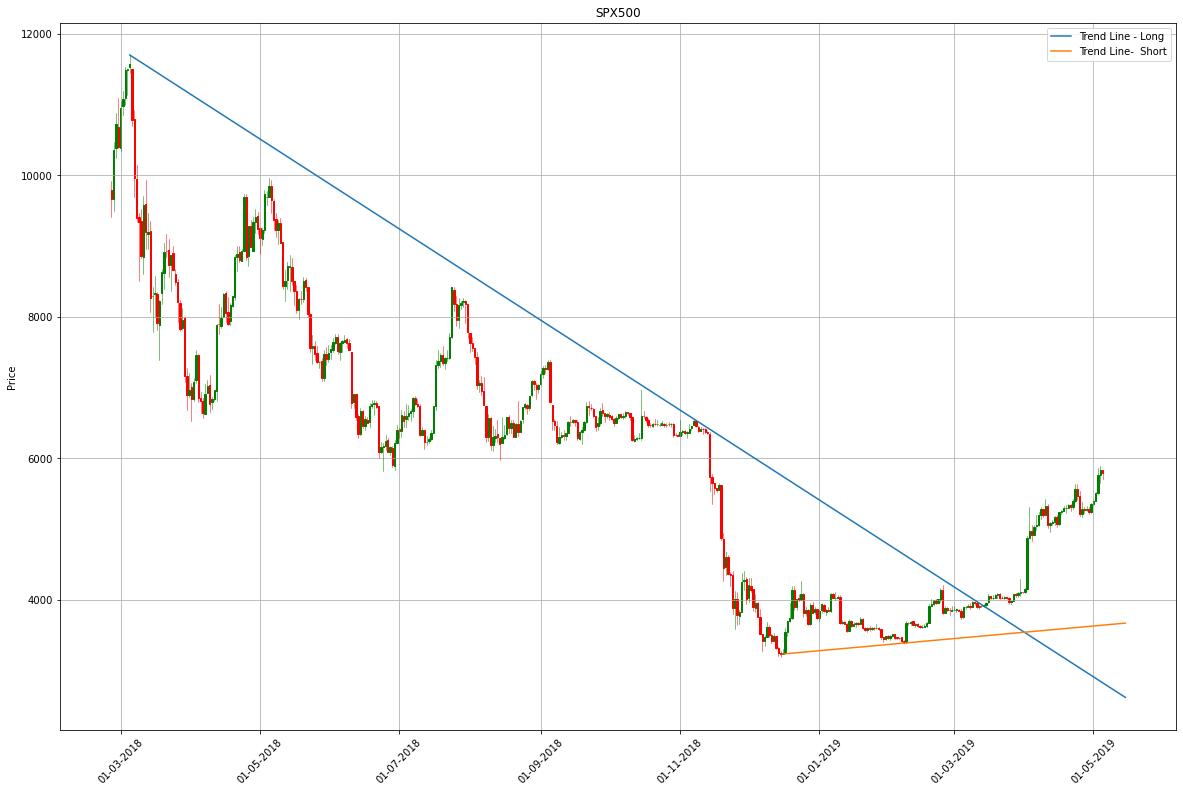

In [451]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X, Y, label='Trend Line - Long')
ax3.plot(X_k, Y_k, label='Trend Line-  Short')
plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()